# Set up

In [302]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point
import difflib as dfb

In [303]:
admin1_path = '../Data/Mapping layout/UBOS19 135 districts data/uganda_districts_2019_i.shp'
#admin1_path = 'data/UBOS19/uganda_districts_2019_i.shp' #Path for Nancy's machine 
admin1_df = gpd.read_file(admin1_path)
admin1_df.to_crs(crs="EPSG:4326",inplace=True)

In [304]:
poe_path='../Data/PoE/2_POE53_from_jenny.csv'
#poe_path='data/2_POE53_from_jenny.csv' #Path for Nancy's machine 
poe_data = pd.read_csv(poe_path)
poe_data.rename({'PoEs':'name','LON':'lon','LAT':'lat'},axis=1,inplace=True)
poe_data.drop(['#','District'],inplace=True,axis=1)

# Get districts of each PoE using lon/lat

In [305]:
poe_data.head()

,name,lon,lat
0,Port Bell,32.654000,0.290000
1,Entebbe Airport,32.443055,0.044721
2,Kiyindi,33.145901,0.279041
3,Katosi,32.803276,0.143008
4,Mutukula,31.416706,-1.000000


In [306]:
# Getting the poe csv into a shapefile

# creating a geometry column 
geometry = [Point(xy) for xy in zip(poe_data['lon'], poe_data['lat'])]

# Coordinate reference system : WGS84
crs = CRS('epsg:4326')

# Creating a Geographic data frame 
poe_df = gpd.GeoDataFrame(poe_data, crs=crs, geometry=geometry)
poe_df.head()

,name,lon,lat,geometry
0,Port Bell,32.654000,0.290000,POINT (32.65400 0.29000)
1,Entebbe Airport,32.443055,0.044721,POINT (32.44306 0.04472)
2,Kiyindi,33.145901,0.279041,POINT (33.14590 0.27904)
3,Katosi,32.803276,0.143008,POINT (32.80328 0.14301)
4,Mutukula,31.416706,-1.000000,POINT (31.41671 -1.00000)


In [307]:
#creating this to male sure border PoE are counted as within

admin1_df['geometry_buffer']=admin1_df.geometry.buffer(0.005)

In [308]:
districts=[]

for i in poe_df.index:
    mask = []
    for j in admin1_df.index:
        test = poe_df.loc[i,'geometry'].within(admin1_df.loc[j,'geometry_buffer'])
        mask.append(test)
    admin1_df['mask']=mask
    district = admin1_df['DName2019'][admin1_df['mask']==True]
    if len(district)==1:
        districts.append(district.iloc[0])
    else:
        districts.append(None)

poe_df['district'] = districts

In [309]:
mask = []
for j in admin1_df.index:
    test = poe_df.loc[14,'geometry'].within(admin1_df.loc[j,'geometry'],)
    mask.append(test)
admin1_df['mask']=mask
district = admin1_df['DName2019'][admin1_df['mask']==True]

In [310]:
poe_df.drop(['geometry','lat','lon'],inplace=True,axis=1)

In [311]:
poe_geom=poe_df.merge(admin1_df[['geometry','DName2019']],left_on='district',right_on='DName2019',how='inner')

In [312]:
poe_geom.drop_duplicates('DName2019',inplace=True)

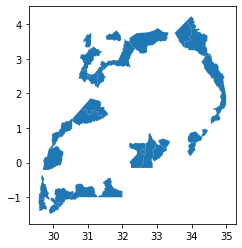

In [313]:
poe_geom.plot()

# Look at border distrcts

In [314]:
border_df.head()

,District
0,KOBOKO
1,YUMBE
2,MOYO
3,ADJUMANI
4,AMURU


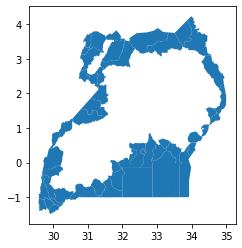

In [315]:
congo = ["Kisoro","Kanungu","Rubirizi","Kasese","Rukungiri","Bundibugyo",
         "Ntoroko","kikuube","Hoima","Buliisa",
         "Pakwach","Nebbi","Zombo","Maracha", "Arua"]
sudan = ["Koboko","Yumbe","Moyo","Adjumani","Amuru",
         "Lamwo","Kitgum","Karenga","Kaabong"]
kenya = ["Moroto","Amudat","Bukwo","Kween",
         "Bududa","Namisindwa","Tororo","Busia",
         "Namayingo"]
tanzania = ["Mayuge","Buvuma","Kalangala","Buikwe",
         "Mukono","Kampala","Wakiso","Mpigi",
          "Kalungu","Masaka","Kyotera","Rakai","Isingiro"]
rwanda = ["Ntungamo","Kabale","Kisoro","Rukiga","Jinja","Rubanda"]            
         

border_districts = sudan + kenya + tanzania + rwanda + congo
border_districts = [x.upper() for x in border_districts]
border_df  = pd.DataFrame()
border_df["District"] = border_districts
border_df.drop_duplicates(inplace=True)

border_districts = admin1_df.merge(border_df, left_on='DName2019',right_on="District")
border_districts.drop_duplicates('DName2019',inplace=True)
border_districts.plot()

### Border districts without official PoE

In [316]:
# Turns out this step is redundant, all PoE are within a border district

border_with_poe_full = border_districts.merge(poe_data[['name','district']],how='inner',left_on='District',right_on="district")
border_with_poe = border_with_poe_full[['District','geometry']].copy()
border_with_poe.drop_duplicates('District',inplace=True)

In [317]:
border_without_poe.reset_index(inplace=True)

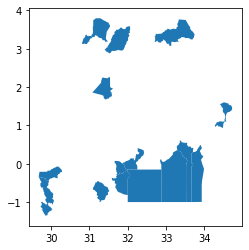

In [318]:
border_without_poe.plot()

In [319]:
print(len(border_without_poe)+len(border_with_poe),len(border_districts))

51 51


# Look at distances with closest PoE

In [320]:
admin1_df['centroid']=admin1_df['geometry'].centroid

In [321]:
#WIP

# Getting this csv into a shapefile

# creating a geometry column 
geometry = [Point(xy) for xy in zip(poe_data['lon'], poe_data['lat'])]

# Coordinate reference system : WGS84
crs = CRS('epsg:4326')

# Creating a Geographic data frame 
poe_df = gpd.GeoDataFrame(poe_data, crs=crs, geometry=geometry)

poe_df.head()

,name,lon,lat,geometry,district
0,Port Bell,32.654000,0.290000,POINT (32.65400 0.29000),KAMPALA
1,Entebbe Airport,32.443055,0.044721,POINT (32.44306 0.04472),WAKISO
2,Kiyindi,33.145901,0.279041,POINT (33.14590 0.27904),BUIKWE
3,Katosi,32.803276,0.143008,POINT (32.80328 0.14301),MUKONO
4,Mutukula,31.416706,-1.000000,POINT (31.41671 -1.00000),KYOTERA


In [322]:
print(admin1_df.loc[95,'DName2019']+"\n",
      poe_df.loc[0,'district']+"\n",
      admin1_df.loc[95,'centroid'].distance(poe_df.loc[0,'geometry']))

print(admin1_df.loc[95,'DName2019']+"\n",
      poe_df.loc[1,'district']+"\n",
      admin1_df.loc[95,'centroid'].distance(poe_df.loc[1,'geometry']))

print(admin1_df.loc[95,'DName2019']+"\n",
      poe_df.loc[3,'district']+"\n",
      admin1_df.loc[95,'centroid'].distance(poe_df.loc[3,'geometry']))

KAMPALA
 KAMPALA
 0.0625712513573998
KAMPALA
 WAKISO
 0.3116547024145487
KAMPALA
 MUKONO
 0.26906581283153397


In [323]:
dist_min = []
in_km = 110.895 # from http://www.csgnetwork.com/degreelenllavcalc.html

for i in admin1_df.index:
    i_dist = []
    for j in poe_df.index:
        d=min(admin1_df.loc[i,'geometry'].hausdorff_distance(poe_df.loc[j,'geometry'])*in_km,
              admin1_df.loc[i,'centroid'].distance(poe_df.loc[j,'geometry'])*in_km)
        i_dist.append(d)
    dist_min.append(min(i_dist))
admin1_df['dist_min'] = dist_min

In [324]:
admin1_df['-70']=list(admin1_df['dist_min']<=70)

In [325]:
sum(list(admin1_df['dist_min']<=70))

88

In [326]:
border_with_poe['tag']=1
border_without_poe['tag']=2

border_with_poe_target=border_with_poe[['District','tag']]
border_with_poe_target.set_index('District',drop=True,inplace=True)

border_without_poe_target=border_without_poe[['District','tag']]
border_without_poe_target.set_index('District',drop=True,inplace=True)

In [327]:
poe=pd.concat([border_with_poe_target,border_without_poe_target])

In [328]:
admin1_df=admin1_df.join(poe,on='DName2019')

In [329]:
admin1_df.drop(['F15Regions','DName2016','DNama2017','dc2017','DName2018','dc2018','geometry_buffer','mask','centroid'],inplace=True,axis=1)

In [330]:
admin1_df['tag'] = np.where((admin1_df['-70'] == True)&(admin1_df['tag'].isnull()), 3, admin1_df['tag'])
admin1_df['tag'] = np.where(admin1_df['tag'].isnull(), 4, admin1_df['tag'])

# Look at the road network

In [332]:
road_path='../Data/Roads/uga_trs_roads_osm.shp'
road_df = gpd.read_file(road_path)

In [333]:
road_select_df = road_df[['ntlclass','geometry']].copy()
road_select_df.rename({'ntlclass':'level'},axis=1,inplace=True)

In [334]:
to_keep=['motorway','trunk','primary','secondary','tertiary']
large = ['motorway','trunk','primary']

road_target_df=road_select_df[road_select_df['level'].isin(to_keep)].copy()

In [335]:
road_target_df['road_kept']=road_target_df['level'].isin(large)

In [336]:
large_roads_df=road_target_df[road_target_df['road_kept']==True].copy()

In [341]:
large_roads_df.reset_index(drop=True, inplace=True)

# Look at the road and district intersects

In [377]:
admin1_df['road_cross']=0

for i in large_roads_df.index:
    inter_add=[]
    for j in admin1_df.index:
        inter = large_roads_df.loc[i,'geometry'].intersection(admin1_df.loc[j,'geometry']).length
        inter_add.append(inter*in_km) # din_km defined above
    admin1_df['inter_add']=inter_add
    admin1_df['road_cross']= admin1_df['road_cross']+admin1_df['inter_add']

In [378]:
admin1_df.drop(['geometry','inter_add'],inplace=True,axis=1)

In [381]:
admin1_df['tag'] = np.where((admin1_df['tag']==4)&(admin1_df['road_cross']>1), 5, admin1_df['tag'])

In [383]:
admin1_df.to_csv('../Data/Results/poe_dist_map.csv')

In [384]:
large_roads_df.to_file('../Data/Results/Road shapes/large_roads.shp')